(12, 6)


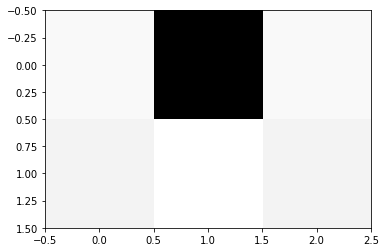

[['30.04.2020'
  'Joel Remmel "Live at Taff Club" vinüülplaadi väljaandmine' 'Muusika'
  1000 1515 57]
 ['01.05.2020' 'Tiutle 2' 'Kat 2' 222 121 232]
 ['02.05.2020' 'Tiutle 3' 'Kat 3' 1000 1515 57]
 ['03.05.2020' 'Tiutle 4' 'Kat 4' 1778 2909 57]
 ['04.05.2020' 'aaa Remmel "Live at Taff Club" vinüülplaadi väljaandmine'
  'Muusika' 222 121 232]
 ['05.05.2020' 'Tiutle 5' 'Kat 5' 1000 1515 57]
 ['06.05.2020' 'Tiutle 6' 'Kat 6' 1778 2909 232]
 ['07.05.2020' 'Tiutle 7' 'Kat 7' 222 121 232]]
144.0
['Лист1', 'Лист2']
    nim  toe 1  kog 1  toe 2  kog 2  toe 1.1  kog 1.1  toe 2.1  kog 2.1
0  Dago     15    393     40    142      NaN      NaN      NaN      NaN
1  Joel      5      4     18     36     35.0      2.0     65.0      4.0
0    Dago
1    Joel
Name: nim, dtype: object
toe 1       10.0
kog 1      198.5
toe 2       29.0
kog 2       89.0
toe 1.1     35.0
kog 1.1      2.0
toe 2.1     65.0
kog 2.1      4.0
dtype: float64


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#инкапсуляция цифт через библеотеку numpy
data = np.loadtxt("http://digo.ee/task04.txt", delimiter=",")
#data = np.loadtxt("http://digo.ee/task04.txt", delimiter=",", skiprows=1, max_rows=1)
#вывод формы файла
print (data.shape)
#Преобразуем данные и сделаем матрицу - квадрат
data = np.reshape(data[0], (2, 3))
plt.imshow(data, cmap='Greys')
plt.show()

#вывод серии данных через pandas
data = pd.read_csv("http://digo.ee/test.csv", na_values="NA", decimal=",")
data.fillna(0, axis=1, inplace=True)
#снятие статистики всех проектов
#print (data.head())
data_array = data.values
print (data_array)
#вывод среднего числа (пользовотелей) по первой категории
#округление среднего числа пользователей
print (data["bak"].mean().round())

#загрузка данных из excel
#анализ подарков и преобразование данных (дата)
data = pd.ExcelFile("http://digo.ee/bake.xlsx")
print (data.sheet_names)
data=data.parse(sheet_name=1, converters={"Date": pd.to_datetime, "DOM time": int})
#переименование колонолк в удобный формат #data=data.parse(sheet_name=1, names=["nimi"], ["num 1"], ["toe 1"], ["num 1"])
print (data.head())
#вызов отдельной колонки
print (data["nim"])
#вызов среднего значения
print (data.mean())

индексы данных                                              Projekt   Toetus
0                                   Lühifilm "Ohver"   1535.0
1  Mari Kalkuni plaadi "Õunaaia album" ja video v...   7338.0
2         Kinkeraamat #õnnelikteekond #becominghappy   2283.0
3         Lexsoul Dancemachine "Lexplosion II" album   6515.0
4  Endise spordiajakirjaniku Valeri Maksimovi elu...   2353.0
5                            Narva Airsoft CQB areen   4185.0
6                           VORONJA SKULPTUURIDE AED   8245.0
7                                      Film "Ankeet"   3067.0
8  Curly Strings ja sõbrad - heategevusliku album...  13389.0
9  "mujal nüüd – elsewhere today" raamatu väljaan...      NaN


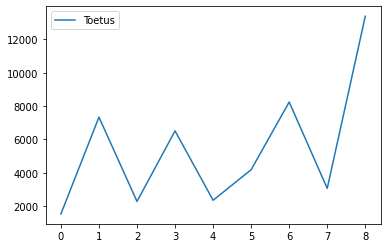

мультииндексы                                                              Toetus
Type    Projekt                                                    
MUU     "mujal nüüd – elsewhere today" raamatu väljaand...      NaN
        Endise spordiajakirjaniku Valeri Maksimovi elul...   2353.0
        Film "Ankeet"                                        3067.0
        Kinkeraamat #õnnelikteekond #becominghappy           2283.0
        Lühifilm "Ohver"                                     1535.0
        Narva Airsoft CQB areen                              4185.0
        VORONJA SKULPTUURIDE AED                             8245.0
MUUSIKA Curly Strings ja sõbrad - heategevusliku albumi...  13389.0
        Lexsoul Dancemachine "Lexplosion II" album           6515.0
        Mari Kalkuni plaadi "Õunaaia album" ja video vä...   7338.0
срезы данных через индексы                                                      Toetus
Projekt                                                    
Curly Strings ja sõbrad

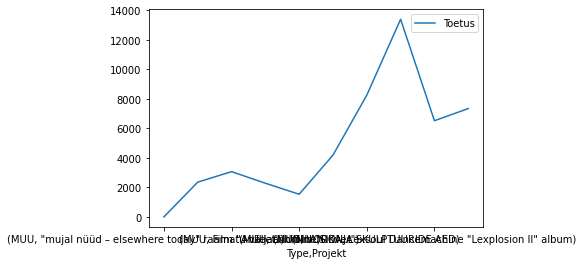

соотношение двух таблиц поиск зависимости одних данных от других Calls
220    13465
Name: UnemployedMen, dtype: int64


In [81]:
# индексы данных
#data = pd.read_csv("http://digo.ee/hooandja.csv", na_values="NA", decimal=".")
#print (data)
data = pd.read_csv("http://digo.ee/hooandja.csv", na_values="NA", decimal=".", skiprows=1, names=["Projekt", "Toetus"])
#data_indexed = pd.Series(data["Toetus"].values, index=data["Projekt"].values)
#print (data_indexed)
#print (data_indexed.index)
#print (data)
#data = data.reset_index()
print ("индексы данных", data)
data.plot.line()
plt.show()

# мультииндексы
area_indexes = data[data["Projekt"].str.contains("album")].index
#создаём генератор
data_areas_index = [(lambda n: "MUUSIKA" if n in area_indexes else "MUU")(i) for i in range(0, len(data.index))]
data["Type"] = data_areas_index
data = data.set_index(["Type", "Projekt"])
data = data.sort_index()
print ("мультииндексы", data)


# срезы данных через индексы
areas = data.loc["MUUSIKA"]
print ("срезы данных через индексы", areas)

# объединение фреймов
data_m = pd.read_csv("http://digo.ee/hooandja.csv", na_values="NA", decimal=".", skiprows=1, names=["Projekt", "Toetus"], index_col="Projekt")
data_n = pd.read_csv("http://digo.ee/hooandja_p.csv", na_values="NA", decimal=".", skiprows=1, names=["Projekt", "Toetus"], index_col="Projekt")
data_a = pd.merge(data_m, data_n, left_index=True, right_index=True)
print ("объединение фреймов", data_a)
data.fillna(0, axis=1, inplace=True)

data.plot.line()
print ("График всех пожертвований")
plt.show()

# объединение данных и сортировка по индексам
# пример из урока

data_1 = pd.read_csv('http://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv', delimiter=';')
data_1 = data_1.set_index(['Year', 'Period'])

data_2 = pd.read_csv('http://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv', delimiter=';')
data_2 = data_2.set_index(['AdmArea', 'Year', 'Month'])
data_2 = data_2.loc['Центральный административный округ']
data_2.index.names = ['Year', 'Period']

data = pd.merge(data_1, data_2, left_index=True, right_index=True)

data = data.reset_index()
data = data.set_index('Calls')
# print(data_1.head())
# print(data_2.head())
data = data.sort_index()
print("соотношение двух таблиц поиск зависимости одних данных от других", data['UnemployedMen'][0:1])